In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bbc-text.csv')

In [3]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [4]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.functional as F
import torch.nn.functional as F

In [5]:
import pandas as pd
from nltk import word_tokenize
import numpy as np

In [6]:
import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords

In [7]:
import nltk

In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
STOPWORDS = set(stopwords.words('english'))

In [10]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [11]:
from gensim import models

In [13]:
from gensim.models import Word2Vec
%matplotlib inline

In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))

In [15]:
df_clean.head()

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [47]:
import spacy

In [52]:
spacy.load('en_core_web_sm')

In [54]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

In [55]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [56]:
df_clean['text_lemmatize_clean']

0       tv future hand viewer home theatre system plas...
1       worldcom boss leave book alone former worldcom...
2       tigers wary farrell gamble leicester say rush ...
3       yeade face newcastle fa cup premiership side n...
4       ocean twelve raid box office ocean twelve crim...
                              ...                        
2220    car pull  retail figure  retail sale fall janu...
2221    kilroy unveil immigration policy exchatshow ho...
2222    rem announce new glasgow concert us band rem a...
2223    political squabble snowball become commonplace...
2224    souness delight euro progress boss graeme soun...
Name: text_lemmatize_clean, Length: 2225, dtype: object

In [57]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)

In [58]:
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
sorted(word_freq, key=word_freq.get, reverse=True)[:10]


['say', 'mr', 'year', 'would', 'make', 'also', 'people', 'new', 'one', 'take']

In [59]:
w2v_model = Word2Vec(min_count=10,
                     window=5,
                     size=100,
                     workers=4)
                     
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

C:\Users\kbltv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


In [60]:
w2v_model.wv.most_similar(positive=['america'])

[('pence', 0.9900715947151184),
 ('shares', 0.987708568572998),
 ('korea', 0.9828416109085083),
 ('barclays', 0.9794329404830933),
 ('carmaker', 0.9793692827224731),
 ('littleknown', 0.9784144163131714),
 ('ba', 0.9781938791275024),
 ('quarterly', 0.9771387577056885),
 ('soar', 0.9750238656997681),
 ('ore', 0.9748830199241638)]

C:\Users\kbltv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


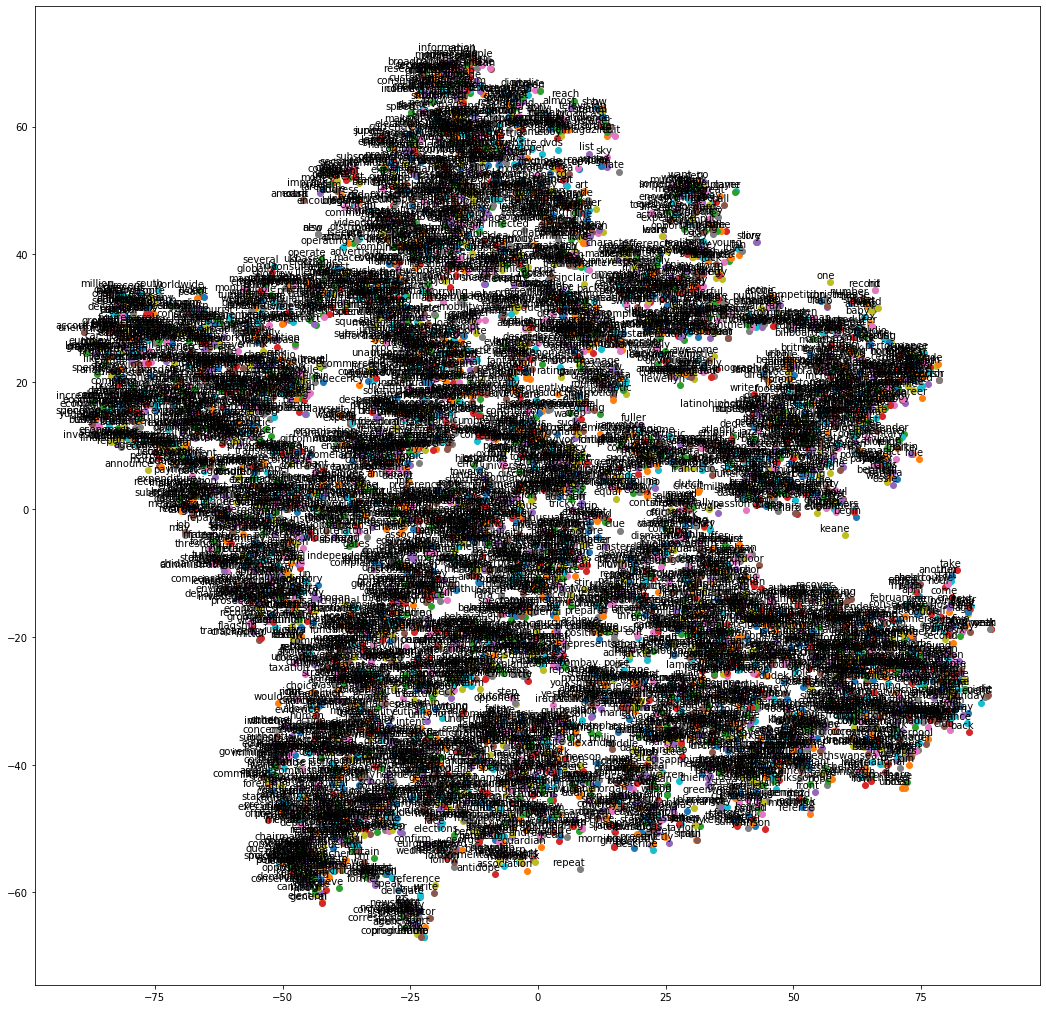

In [62]:
from matplotlib import pyplot as plt
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)

In [63]:
import sys

In [64]:
import matplotlib.pyplot as plt

In [65]:
vector = w2v_model.wv['america']
print(len(vector))
print(vector)

100
[ 8.90493914e-02  6.73182458e-02 -2.51270514e-02  4.99702096e-02
  1.55214623e-01  6.05411604e-02 -1.54100165e-01  1.19769245e-01
  1.13310486e-01  6.30754977e-02 -1.38181895e-02 -1.20538168e-01
 -1.67401269e-01 -2.32548416e-01 -2.43221354e-02  9.40274447e-02
  3.57144475e-02 -1.22077473e-01  3.20541151e-02  9.67605785e-02
  4.55168337e-02  4.21829745e-02 -1.06287889e-01  5.87102957e-02
  1.42430678e-01 -6.39006943e-02  3.86127569e-02  6.70607314e-02
 -1.71220209e-02 -1.53314695e-01  3.27175744e-02  6.00912198e-02
 -2.20772438e-02  1.15376599e-02  1.01133153e-01  8.92180353e-02
 -8.59561265e-02 -1.11525981e-02  2.27942899e-01 -1.89775378e-01
  2.66981442e-02  4.16424982e-02  5.82082458e-02 -1.18653715e-01
  9.93921012e-02  8.42769146e-02 -1.27444506e-01  4.03836323e-03
 -7.62511641e-02 -1.24649005e-02 -1.38760075e-01  2.83669978e-02
 -3.95277562e-03 -8.25272501e-02 -8.15266073e-02 -1.39156595e-01
 -2.02532753e-01 -1.04995452e-04  6.85892999e-02  1.04565859e-01
 -4.66980711e-02 -2.2